<a href="https://colab.research.google.com/github/adventurousAyan/AyanRepo/blob/master/ML_Practice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
data = pd.read_csv("/content/Frogs_MFCCs.csv")

In [177]:
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [178]:
data.shape

(7195, 26)

In [82]:
data.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')

In [174]:
data.nunique()

MFCCs_ 1     249
MFCCs_ 2    7140
MFCCs_ 3    7026
MFCCs_ 4    7175
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family         4
Genus          8
Species       10
RecordID      60
dtype: int64

In [84]:
data.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

In [85]:
modData = data.copy()

In [86]:
modData.drop("RecordID", axis=1, inplace=True)

In [87]:
modData.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


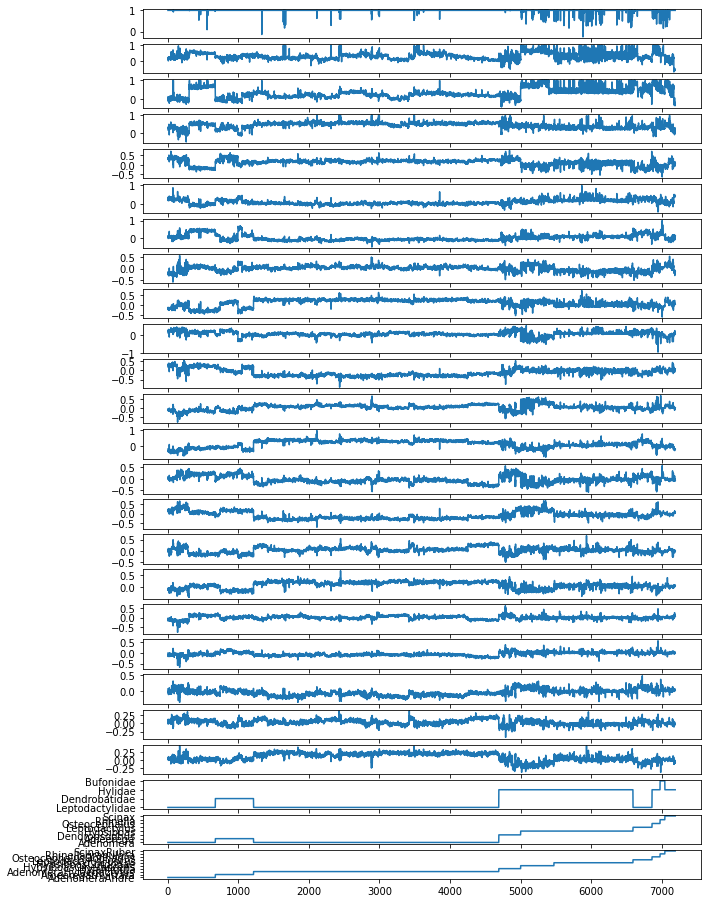

In [88]:
from matplotlib import pyplot
# retrieve data as numpy array
values = modData.values
# create a subplot for each time series
pyplot.figure(figsize=(10, 16))
for i in range(values.shape[1]):
    pyplot.subplot(values.shape[1], 1, i+1)
    pyplot.plot(values[:, i])
pyplot.show()

In [89]:
Q1 = modData.quantile(0.25)
Q3 = modData.quantile(0.75)
IQR = Q3 - Q1
cleaned_eeg_df = modData[~((modData < (Q1 - 1.5 * IQR)) |
                          (modData > (Q3 + 1.5 * IQR)))\
                        .any(axis=1)]
print(cleaned_eeg_df.shape)

(5416, 25)


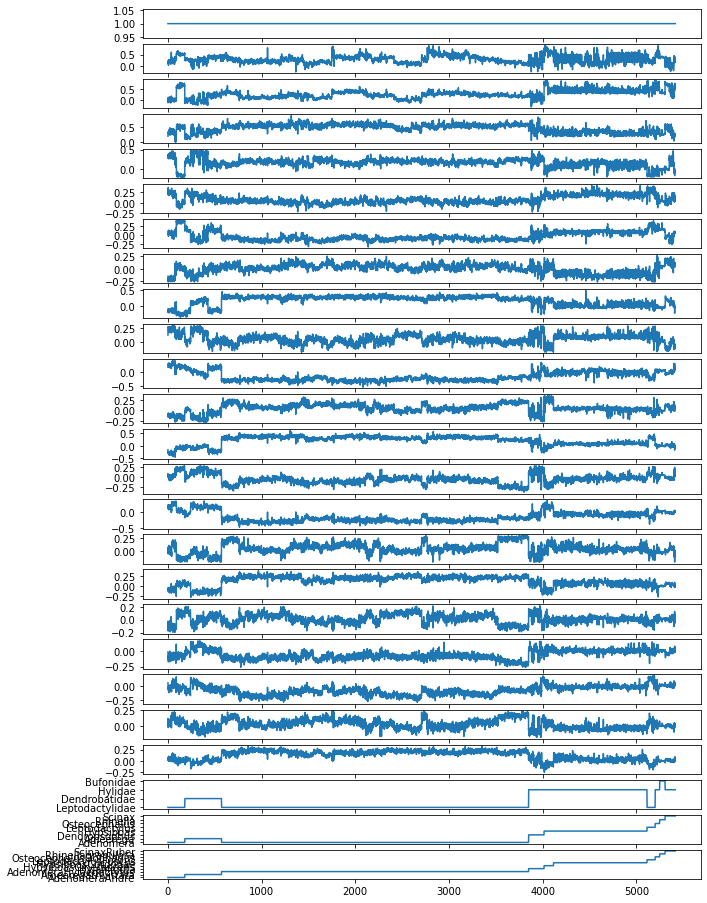

In [90]:
from matplotlib import pyplot
# retrieve data as numpy array
values = cleaned_eeg_df.values
# create a subplot for each time series
pyplot.figure(figsize=(10, 16))
for i in range(values.shape[1]):
    pyplot.subplot(values.shape[1], 1, i+1)
    pyplot.plot(values[:, i])
pyplot.show()

In [91]:
numData = cleaned_eeg_df.select_dtypes(include=['float64'])
numData

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7170,1.0,0.242842,0.516606,0.263976,-0.040676,0.052257,0.055201,0.125361,-0.023455,-0.064192,0.136730,0.072579,-0.006024,0.055126,0.002086,-0.014339,0.004518,-0.013307,-0.001609,0.022170,0.014327,0.003001
7171,1.0,0.153789,0.522557,0.267617,-0.043499,0.034436,0.081305,0.113272,-0.034906,-0.055563,0.102681,0.080970,-0.009004,0.014452,-0.002528,-0.010471,-0.005648,-0.028727,0.031281,0.033687,0.005242,0.014982
7172,1.0,0.266711,0.735734,0.233772,-0.075867,0.140193,0.080212,0.119675,-0.038130,-0.033289,0.174651,0.042784,-0.079008,0.034721,0.030751,0.002621,-0.027436,-0.007999,0.058854,0.008365,0.019086,0.090131
7173,1.0,0.183156,0.506970,0.247162,-0.048503,0.041090,0.093071,0.109081,-0.049473,-0.044991,0.113973,0.077829,-0.012019,0.017840,0.019535,0.002808,-0.008959,-0.034239,0.036489,0.042205,0.003017,0.005602


In [92]:
numData.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
count,5416.0,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000,5416.000000
mean,1.0,0.288744,0.259309,0.460956,0.159381,0.075874,-0.042530,0.003957,0.162724,0.055772,-0.153487,0.055212,0.202861,-0.060630,-0.156256,0.052946,0.123423,0.012414,-0.058027,-0.077902,0.031189,0.120385
std,0.0,0.173626,0.178564,0.137720,0.110054,0.094538,0.125229,0.092454,0.154349,0.079792,0.170999,0.106580,0.178654,0.114450,0.151961,0.097463,0.117108,0.069432,0.071433,0.079148,0.072130,0.102525
min,1.0,-0.280930,-0.298004,0.007922,-0.204287,-0.221435,-0.344937,-0.267752,-0.366712,-0.179257,-0.544190,-0.283162,-0.452333,-0.390073,-0.477649,-0.208919,-0.280910,-0.196874,-0.262626,-0.293647,-0.170751,-0.257039
25%,1.0,0.157293,0.144354,0.350422,0.112171,0.007731,-0.134223,-0.046821,0.075354,0.006340,-0.286415,0.005949,0.073885,-0.127730,-0.274553,-0.000318,0.050454,-0.030611,-0.109400,-0.139588,-0.021464,0.028329
50%,1.0,0.276518,0.254002,0.501431,0.172452,0.056955,-0.080233,0.016228,0.220414,0.059152,-0.211105,0.058163,0.261952,-0.059694,-0.197884,0.045906,0.153831,0.014309,-0.063865,-0.076398,0.021841,0.152103
75%,1.0,0.406766,0.357715,0.564696,0.220426,0.147717,0.048448,0.069401,0.276581,0.100628,-0.030564,0.122750,0.344255,-0.009007,-0.065049,0.103873,0.212841,0.059728,-0.001620,-0.020225,0.080918,0.205139
max,1.0,0.914445,0.868378,0.888919,0.478334,0.411951,0.401650,0.268920,0.485847,0.294953,0.432828,0.360974,0.602573,0.285069,0.349310,0.296019,0.375177,0.215725,0.174753,0.183801,0.238470,0.331624


In [93]:
cleaned_eeg_df.isnull().sum()

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
dtype: int64

In [94]:
cleaned_eeg_df.Family.unique()

array(['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae'],
      dtype=object)

In [95]:
cleaned_eeg_df.Species.unique()

array(['AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus',
       'Rhinellagranulosa', 'ScinaxRuber'], dtype=object)

In [96]:
cleaned_eeg_df.Genus.unique()

array(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'],
      dtype=object)

In [97]:
data.isna().sum()


MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64

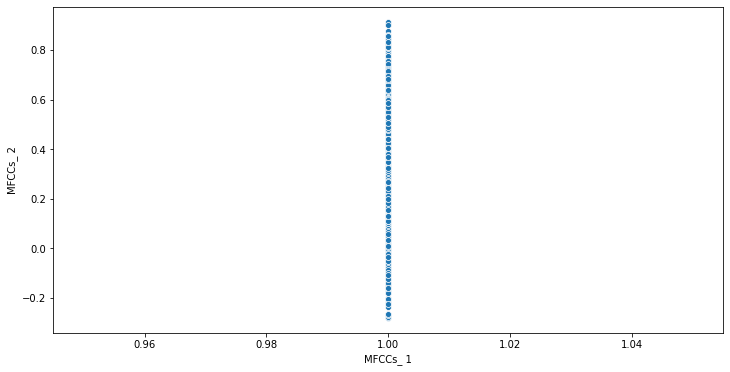

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = numData["MFCCs_ 1"], y = numData["MFCCs_ 2"])

In [99]:
corr = numData.corr()

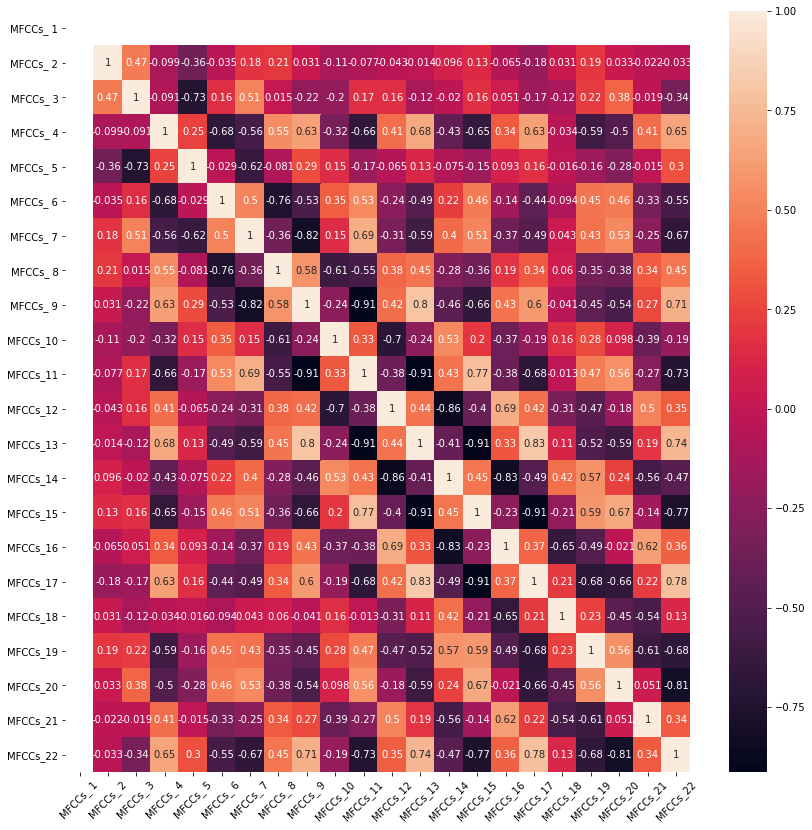

In [100]:
plt.figure(figsize=(14, 14))
sns.heatmap(corr, 
            annot = True)
plt.xticks(rotation=45)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
y = cleaned_eeg_df[['Family','Species','Genus']]
y

,Family,Species,Genus
0,Leptodactylidae,AdenomeraAndre,Adenomera
1,Leptodactylidae,AdenomeraAndre,Adenomera
2,Leptodactylidae,AdenomeraAndre,Adenomera
3,Leptodactylidae,AdenomeraAndre,Adenomera
4,Leptodactylidae,AdenomeraAndre,Adenomera
...,...,...,...
7170,Hylidae,ScinaxRuber,Scinax
7171,Hylidae,ScinaxRuber,Scinax
7172,Hylidae,ScinaxRuber,Scinax
7173,Hylidae,ScinaxRuber,Scinax


In [103]:
numData.shape

(5416, 22)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(numData, y, train_size=0.75,  test_size=0.25, random_state=42)

In [105]:
X_train.shape

(4062, 22)

In [106]:
y_train.shape

(4062, 3)

In [107]:
X_test.shape

(1354, 22)

In [108]:
ss = StandardScaler()
X_train_imputed = pd.DataFrame(ss.fit_transform(X_train))

In [109]:
X_test_imputed = pd.DataFrame(ss.transform(X_test))

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA(n_components=0.99, whiten=True)

In [112]:
x_pca_train = pd.DataFrame(pca.fit_transform(X_train_imputed))
x_pca_test = pd.DataFrame(pca.transform(X_test_imputed))

In [113]:
print(f'Shape for PCA Train is {x_pca_train.shape}')
print(f'Shape for PCA Test is {x_pca_test.shape}')

Shape for PCA Train is (4062, 16)
Shape for PCA Test is (1354, 16)


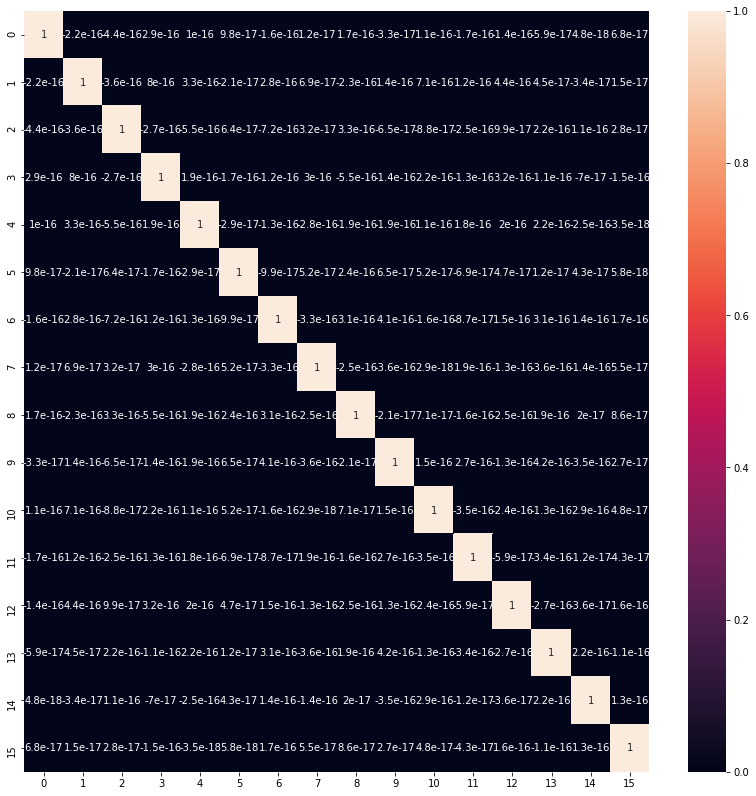

In [114]:
plt.figure(figsize=(14,14))
sns.heatmap(x_pca_train.corr(), annot = True)
plt.show()

In [115]:

from sklearn.cluster import KMeans
wss = []
for k in range(2,20):
    km = KMeans(n_clusters=k)
    km.fit(x_pca_train)
    wss.append(km.inertia_)

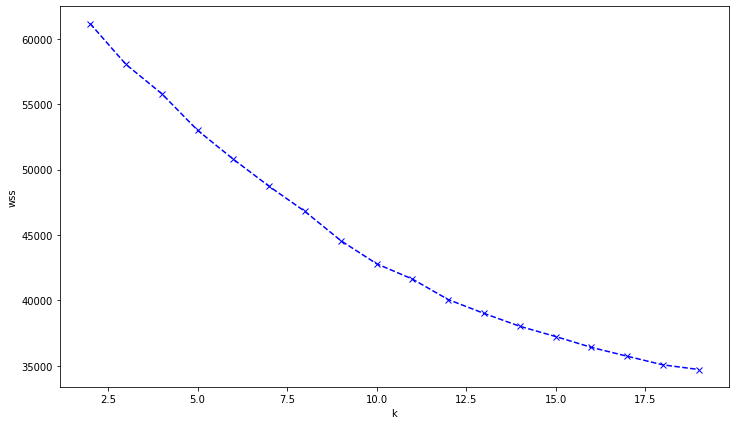

In [116]:
plt.figure(figsize=(12,7))
plt.plot(range(2,20), wss, 'bx--')
plt.xlabel('k')
plt.ylabel('wss')
plt.show()

In [117]:

km = KMeans(n_clusters=10, random_state=4545, n_init=50)
km.fit(x_pca_train)
kmeans_clusters = km.predict(x_pca_train)


In [118]:
kmeans_clusters

array([5, 9, 2, ..., 2, 4, 1], dtype=int32)

In [119]:
x_pca_train['Cluster'] = pd.Series(kmeans_clusters)

In [120]:
x_pca_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Cluster
0,1.270061,-0.192580,0.577974,1.208528,0.011636,-0.526652,0.945348,-0.677179,0.375856,-0.022602,-1.646906,-0.721155,-1.629358,0.495694,0.738990,0.004633,5
1,-1.103668,0.124024,-1.058052,-0.946471,-0.382056,-0.067213,0.435096,-0.424885,1.292572,-0.340737,-1.295913,1.247413,-0.346970,1.287689,-1.101550,0.286762,9
2,0.555879,0.739470,-0.518570,0.768608,-1.742491,0.816933,0.631212,-1.552919,-1.989707,0.815628,-1.534854,0.152393,2.338868,-1.439066,-1.367496,-1.157047,2
3,1.055944,-0.112471,0.280979,1.432824,0.468791,-0.970465,0.318194,-0.494146,-0.286089,-0.185487,-1.145973,-0.116580,0.574045,-0.249768,0.354801,-0.442560,5
4,-0.637301,0.049004,-0.603599,-0.002643,-0.657182,0.327237,-0.129276,-0.347696,-0.135408,-0.985828,-0.014882,0.820962,0.259324,-0.712449,0.401112,-2.033190,9


In [121]:
kmeans_test_clusters = km.predict(x_pca_test)

In [122]:
x_pca_test['Cluster'] = pd.Series(kmeans_test_clusters)
x_pca_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Cluster
0,1.662302,-0.453416,3.486797,-1.506263,-1.975729,1.027345,-0.282888,-0.466313,1.047948,-0.644924,-0.120015,-0.291189,-0.894164,-0.825695,0.607322,1.616848,0
1,1.126028,-0.074419,0.234389,1.676358,0.302333,-0.755936,-0.091703,-0.462298,0.320019,0.568360,-0.971965,-0.435426,0.016583,0.010372,-0.325808,-0.197370,5
2,0.886814,-0.242886,0.896676,1.722786,0.025501,-0.583866,0.693475,-0.995702,1.382200,0.233726,-0.701876,-0.606467,-1.220206,-0.044501,1.000160,0.695087,5
3,-0.590052,-0.482484,-1.043838,-0.091803,-0.657515,0.394382,0.569267,-0.893499,0.121564,0.961947,-1.707887,0.597072,-0.277118,0.784387,-0.414021,0.551718,9
4,-0.801122,-1.216895,0.555017,0.671184,0.018820,0.155414,0.276867,-1.189845,0.406585,-1.095024,0.791361,-0.066910,-0.786646,1.406142,0.067170,-0.535921,1


In [132]:
y_train['Species'].value_counts()

AdenomeraHylaedactylus    2476
HypsiboasCordobae          736
Ameeregatrivittata         285
AdenomeraAndre             127
HylaMinuta                 124
ScinaxRuber                 84
HypsiboasCinerascens        79
LeptodactylusFuscus         72
Rhinellagranulosa           40
OsteocephalusOophagus       39
Name: Species, dtype: int64

In [133]:
y_train['Family'].value_counts()

Leptodactylidae    2675
Hylidae            1062
Dendrobatidae       285
Bufonidae            40
Name: Family, dtype: int64

In [134]:
y_train['Genus'].value_counts()

Adenomera        2603
Hypsiboas         815
Ameerega          285
Dendropsophus     124
Scinax             84
Leptodactylus      72
Rhinella           40
Osteocephalus      39
Name: Genus, dtype: int64

In [135]:
x_pca_test.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
5          float64
6          float64
7          float64
8          float64
9          float64
10         float64
11         float64
12         float64
13         float64
14         float64
15         float64
Cluster      int32
dtype: object

In [138]:
x_pca_test['Cluster'] = x_pca_test['Cluster'].astype('category')
x_pca_train['Cluster'] = x_pca_train['Cluster'].astype('category')

In [139]:
y_train.dtypes

Family     object
Species    object
Genus      object
dtype: object

In [128]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [145]:
def fn_build_model(model, x_train, y_train, parameters=None,k=1):
    model = MultiOutputClassifier(model, n_jobs=-1)
    if parameters == None:
        model = model.fit(x_train,y_train)
    else:
        model_cv = GridSearchCV(model,param_grid=parameters, cv=k)
        model_cv.fit(x_train,y_train)
        model = model_cv.best_estimator_
    
    return model  

In [189]:
def fn_compute_metrics(model, x_train,y_train, method_type, iterNo, modelName):
    predictions = model.predict(x_train) 
    print(multilabel_confusion_matrix(y_train, predictions, labels=["Family", "Species", "Genus"]))
    


In [144]:
from sklearn.multioutput import MultiOutputClassifier

In [148]:
base_mod = fn_build_model(dtc, x_pca_train, y_train)
base_mod

MultiOutputClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=42,
               

In [150]:
from sklearn.metrics import multilabel_confusion_matrix

In [190]:
fn_compute_metrics(base_mod,x_pca_train,y_train,'Train',1,'Base Model')

ValueError: ignored

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
rfc = RandomForestClassifier()
base_mod_rfc = fn_build_model(rfc, x_pca_train,y_train)
base_mod_rfc

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                  